In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [25]:
df["Experience"] = np.log2(df["YearsExperience"])

In [26]:
df.head()

,YearsExperience,Salary,Experience
0,1.1,39343.0,0.137504
1,1.3,46205.0,0.378512
2,1.5,37731.0,0.584963
3,2.0,43525.0,1.000000
4,2.2,39891.0,1.137504


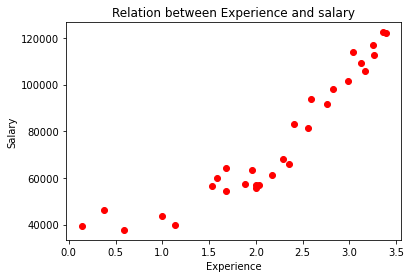

In [27]:
plt.scatter(df["Experience"],df["Salary"],color="red")
plt.title("Relation between Experience and salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

# Fitting the dataset

In [28]:
X = df["Experience"]
y = df["Salary"]

In [29]:
a = sum((X-np.mean(X))*(y-np.mean(y)))
b = sum((X-np.mean(X))**2)

In [30]:
b1 = a/b
b1

28129.290535838496

In [31]:
b0 = np.mean(y)-b1*np.mean(X)

In [32]:
b0

14927.971770057266

In [33]:
y_pred = b0+b1*X
y_pred

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
Name: Experience, dtype: float64

In [34]:
pd.DataFrame({"Predicted":y_pred,"Actual":y})

,Predicted,Actual
0,18795.848339,39343.0
1,25575.235192,46205.0
2,31382.551905,37731.0
3,43057.262306,43525.0
4,46925.138875,39891.0
5,58136.050079,56642.0
6,59511.842441,60150.0
7,62130.943929,54445.0
8,62130.943929,64445.0
9,68022.718504,57189.0


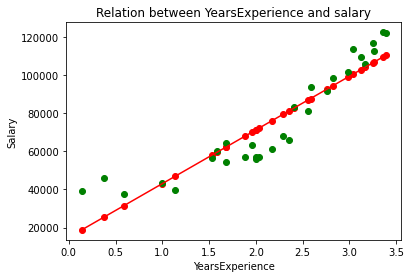

In [35]:
plt.scatter(X,y_pred,color="red")
plt.plot(X,y_pred,color="red")
plt.scatter(X,y,color="green")
plt.title("Relation between YearsExperience and salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

# Finding the accuracy

In [36]:
(sum((y-y_pred)**2))/10

318448856.1655163

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

106149618.72183879

In [38]:
from sklearn.metrics import r2_score
accuracy = r2_score(y,y_pred)

In [39]:
print("Accuracy of simple linear Model is: ",accuracy)

Accuracy of simple linear Model is:  0.853888882875697


# Accuracy is 95.69%

In [40]:
model=smf.ols("Salary~Experience",data=df).fit()

# Model Testing

In [41]:
model.params

Intercept     14927.971770
Experience    28129.290536
dtype: float64

In [42]:
model.tvalues, model.pvalues

(Intercept      2.895135
 Experience    12.791989
 dtype: float64,
 Intercept     7.268813e-03
 Experience    3.250155e-13
 dtype: float64)

In [43]:
model.rsquared , model.rsquared_adj

(0.853888882875697, 0.8486706286926862)

# Model Predictions

In [44]:
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [45]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [1]:
data_pred=pd.DataFrame(new_data,columns=['Experience'])
data_pred

NameError: name 'pd' is not defined

In [49]:
model.predict(data_pred)

0     99315.843378
1    155574.424449
dtype: float64